The K-Means clustering process executes in a three-step process:

The algorithm selects k-number of center points by sampling from the dataset. After this, it loops:
- It assigns each sample to the nearest centroid.
- It creates new centroids by taking the mean value of all of the samples assigned to the previous centroids.
- Then, it calculates the difference between the new and old centroids and repeats until the centroids are stabilized.

One drawback of using K-Means includes the fact that you will need to establish 'k', that is the number of centroids. Fortunately the 'elbow method' helps to estimate a good starting value for 'k'. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('cleaned_nigerian-songs.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              286 non-null    object 
 1   album             286 non-null    object 
 2   artist            286 non-null    object 
 3   artist_top_genre  286 non-null    object 
 4   release_date      286 non-null    int64  
 5   length            286 non-null    int64  
 6   popularity        286 non-null    int64  
 7   danceability      286 non-null    float64
 8   acousticness      286 non-null    float64
 9   energy            286 non-null    float64
 10  instrumentalness  286 non-null    float64
 11  liveness          286 non-null    float64
 12  loudness          286 non-null    float64
 13  speechiness       286 non-null    float64
 14  tempo             286 non-null    float64
 15  time_signature    286 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

Check for outliers using box plots.
Concentrate on columns with fewer outliers.
Note, Boxplots do not show variance, an important element of good clusterable data

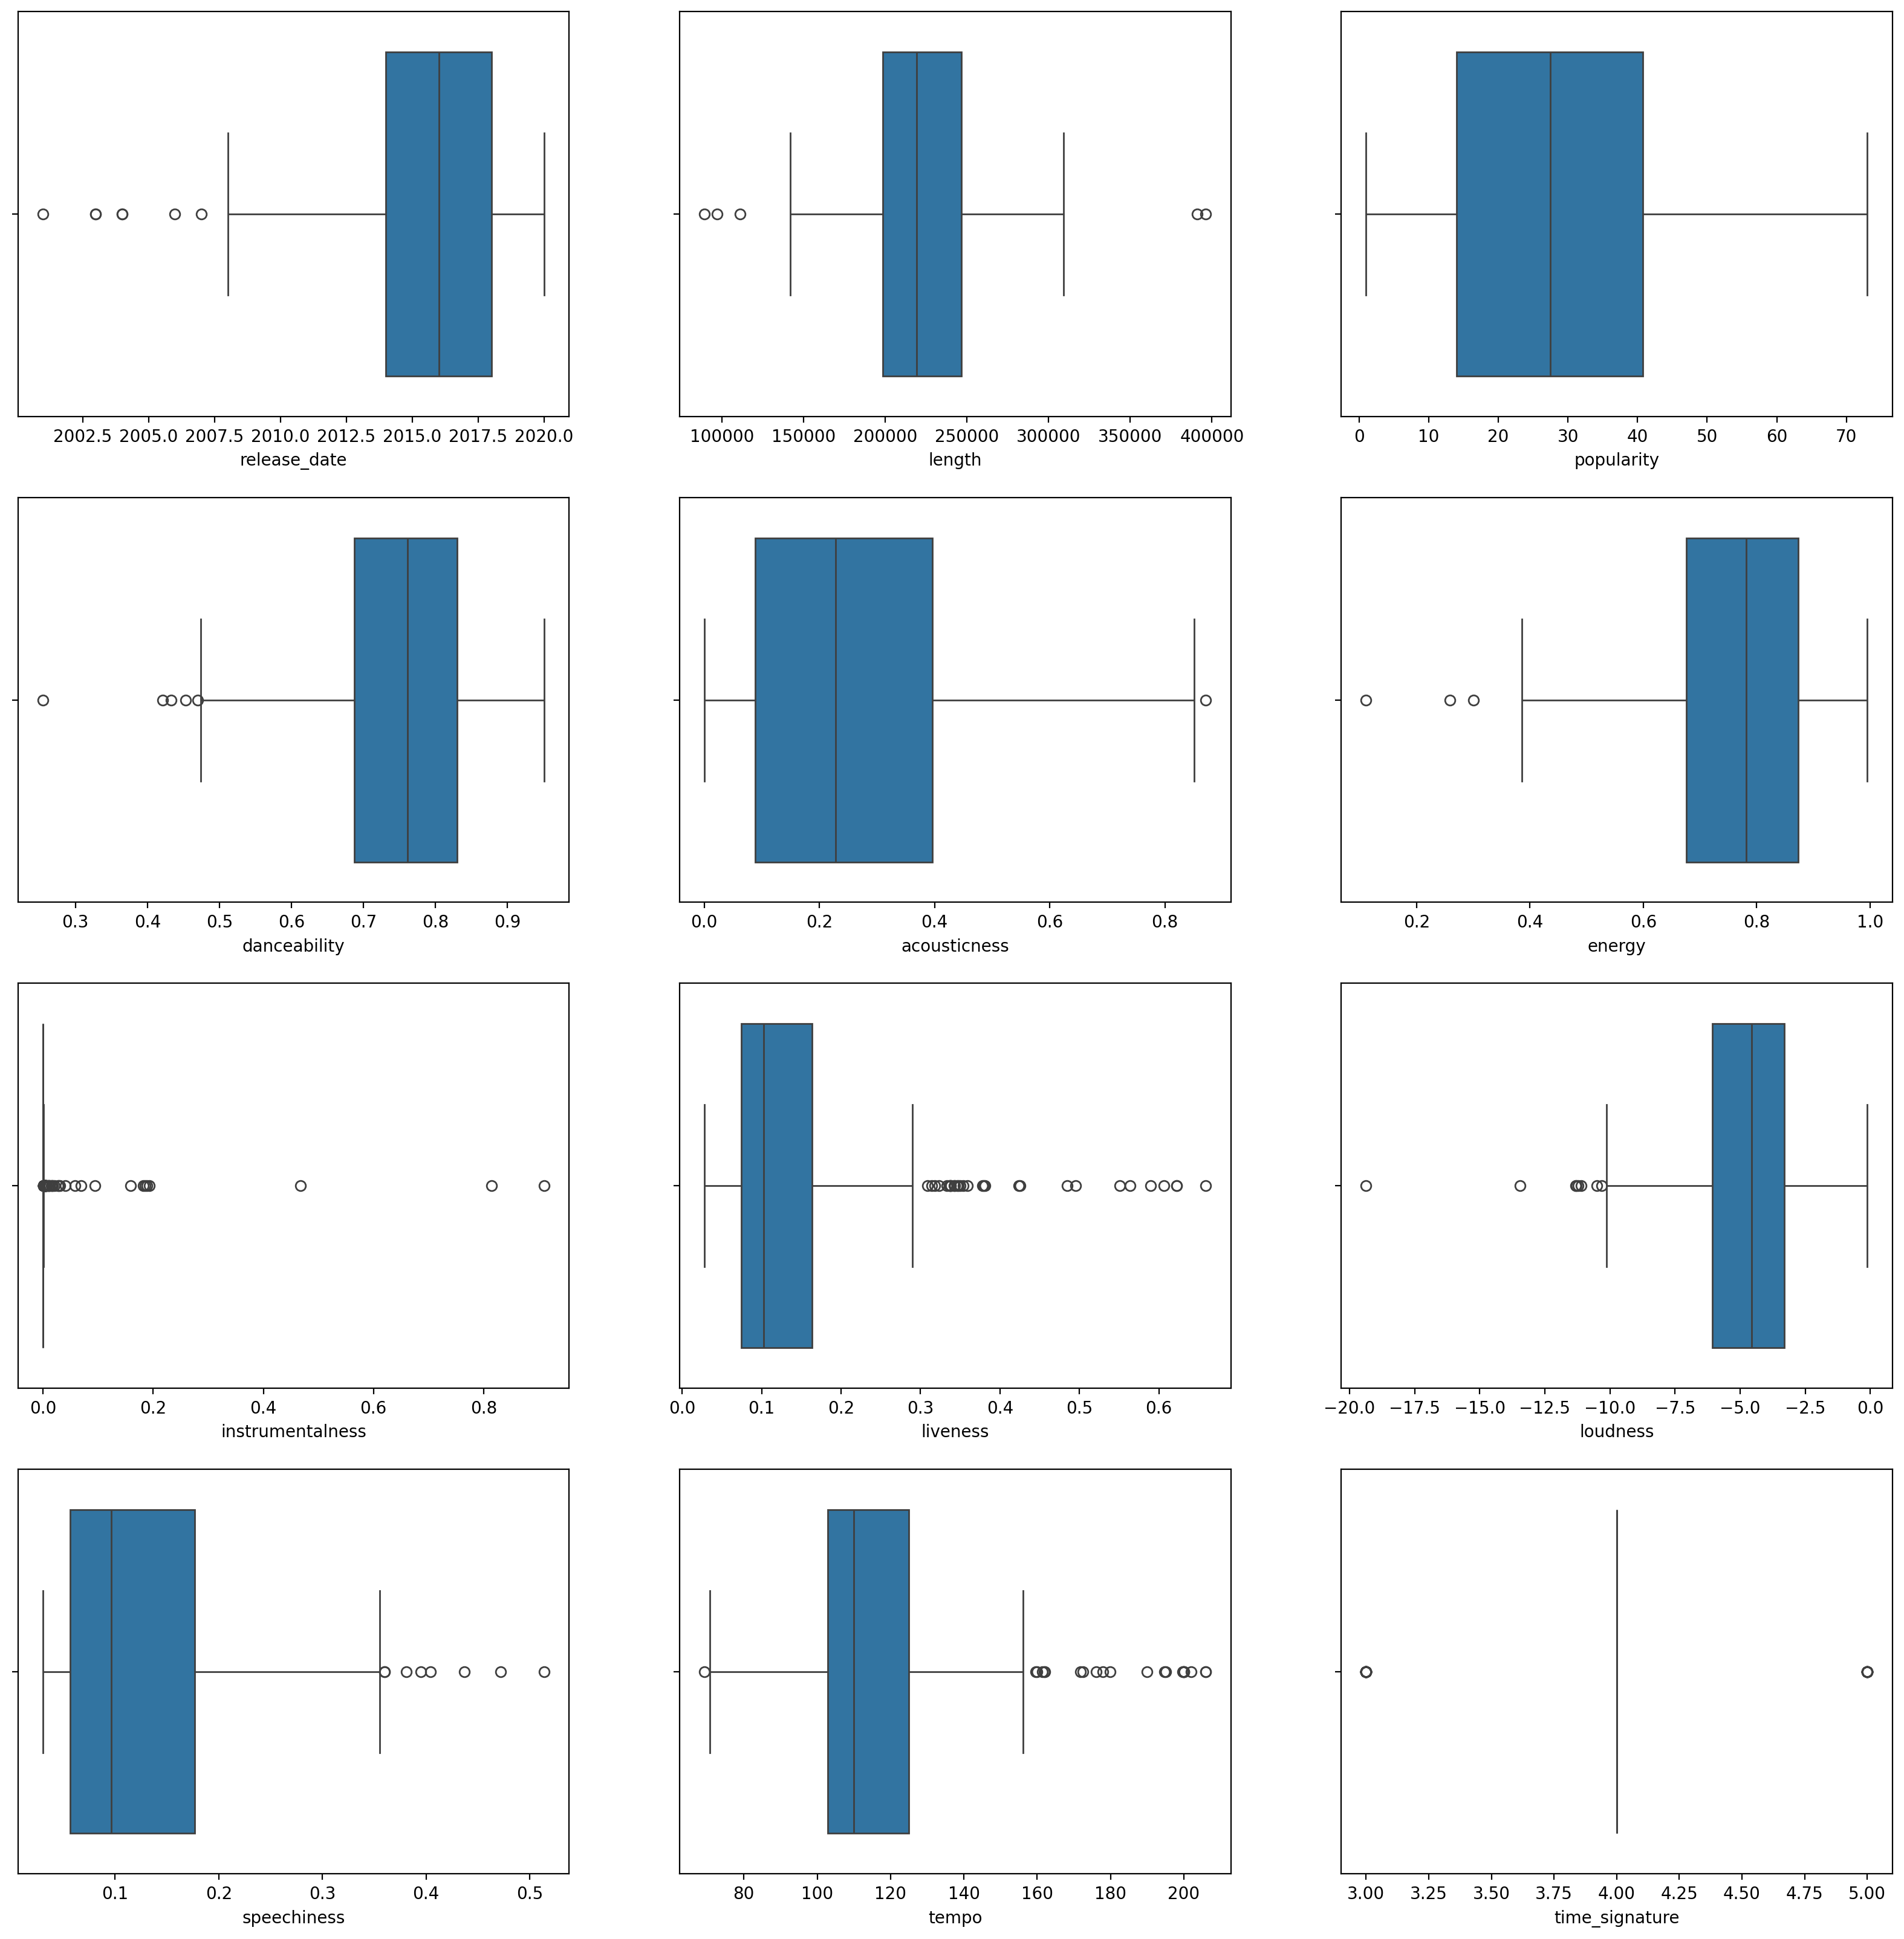

In [2]:
plt.figure(figsize=(20,20), dpi=200)

columns_to_plot = df.select_dtypes(include=['float64', 'int64']).columns

for i, column in enumerate(columns_to_plot):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = column, data = df)

Pick ones with similar ranges and encode the artist_top_genre column as numeric data

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

X = scaler.fit_transform(X)

y = le.transform(y)

 pick how many clusters to target. 3 song genres for this dataset

In [4]:
from sklearn.cluster import KMeans  

nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 0, 0,
       0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

calculate a 'silhouette score'

In [5]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.19150081044335224

### Build a model

🎓 range: These are the iterations of the clustering process

🎓 random_state: "Determines random number generation for centroid initialization." Source

🎓 WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid. 

🎓 Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are." Source. The value is appended to the wcss variable on each iteration.

🎓 k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#### Elbow method

create a chart showing where the 'bend' in the elbow is, which indicates the optimum number of clusters

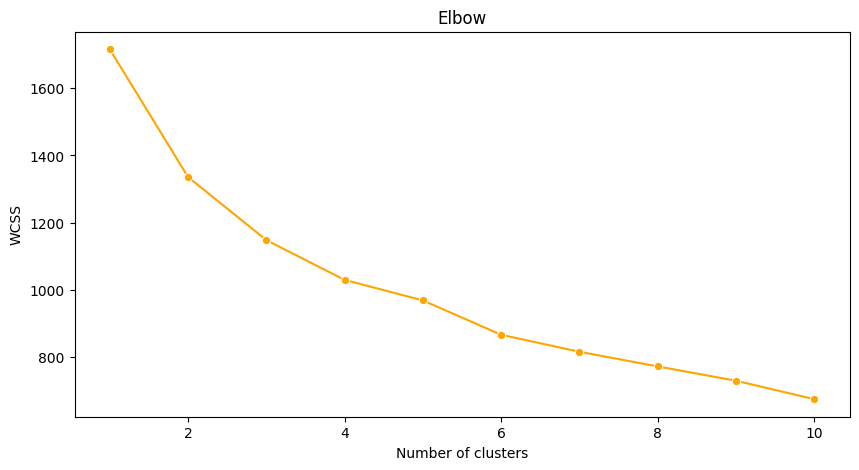

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='orange')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### display the clusters

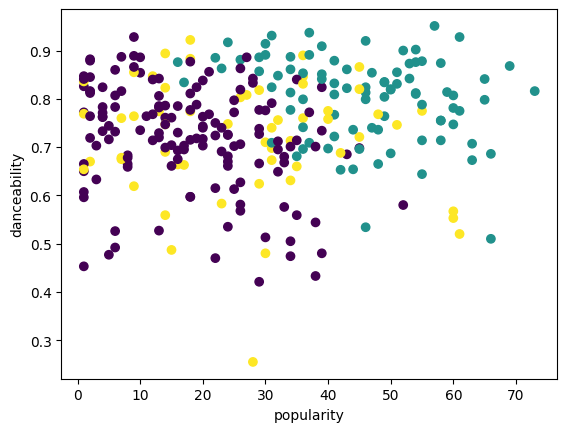

In [8]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

Check the model's accuracy:



In [9]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print(f'Accuracy score: {correct_labels/float(y.size):0.3f}')


Result: 163 out of 286 samples were correctly labeled.
Accuracy score: 0.570
